In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('breast_cancer.csv')
df.shape

(4024, 16)

In [3]:
df.sample(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
2726,58,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,11,Positive,Positive,13,2,48,Alive
1833,59,White,Married,T2,N3,IIIC,Moderately differentiated,2,Regional,28,Positive,Negative,22,19,45,Dead
2812,58,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,26,Positive,Negative,19,1,44,Dead
1729,43,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,25,Positive,Positive,8,4,49,Dead
3296,47,Other,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,40,Positive,Positive,13,4,103,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [6]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [7]:
# df['Marital Status'].unique()
# df['N Stage'].unique()
# df['6th Stage'].unique()
# df['Marital Status'].value_counts()

categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

for i in categorical_columns:
    print(df[i].unique())
    print(df[i].value_counts())


Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status', 'Status'],
      dtype='object')
['White' 'Black' 'Other']
Race
White    3413
Other     320
Black     291
Name: count, dtype: int64
['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64
['T1' 'T2' 'T3' 'T4']
T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64
['N1' 'N2' 'N3']
N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64
['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64
['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated  

<Axes: xlabel='Reginol Node Positive', ylabel='Survival Months'>

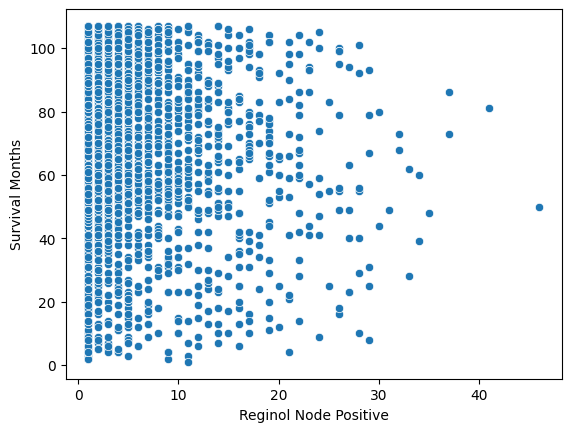

In [8]:
sns.scatterplot(data=df, x="Reginol Node Positive", y="Survival Months")

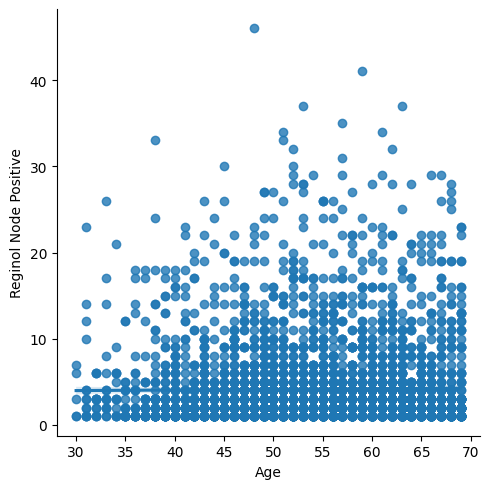

In [9]:
sns.lmplot(x="Age", y="Reginol Node Positive", data=df)

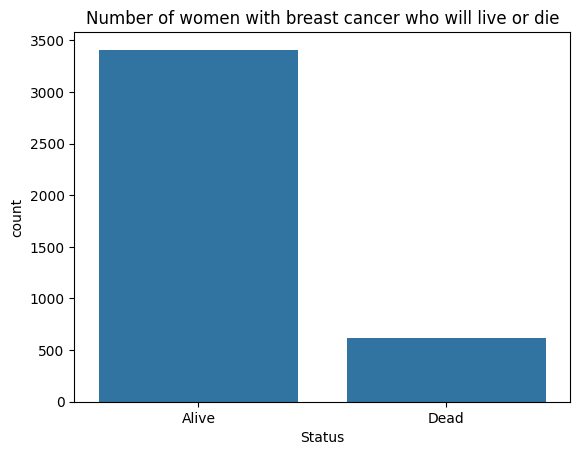

In [10]:
sns.countplot(x="Status",data=df)
plt.title('Number of women with breast cancer who will live or die')
plt.show()

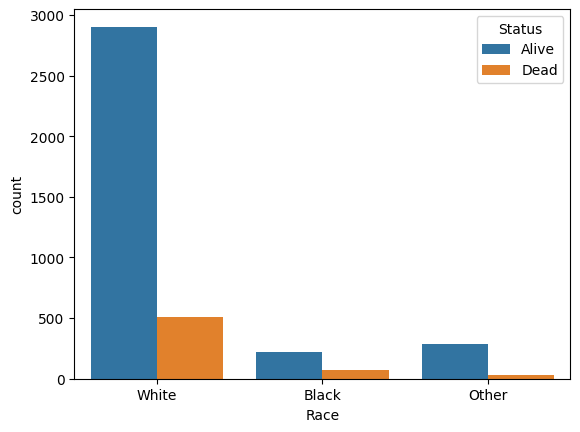

In [11]:
sns.countplot(x='Race', hue='Status', data=df)
plt.show()


<Axes: xlabel='Marital Status', ylabel='count'>

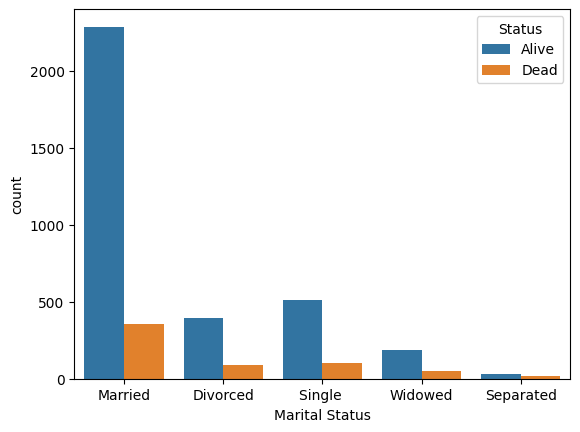

In [12]:
sns.countplot(x='Marital Status',hue='Status',data=df)

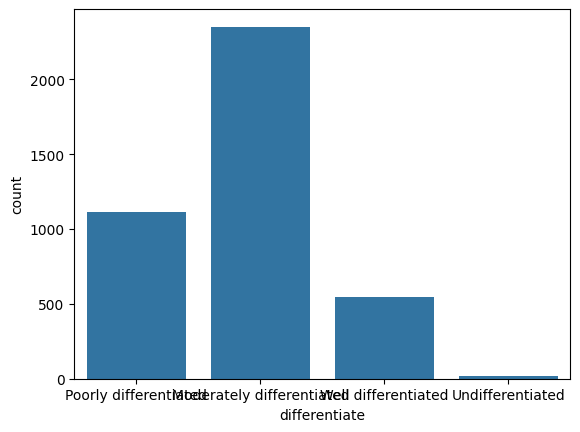

In [13]:
sns.countplot(x='differentiate',data=df)
plt.show()

<Axes: xlabel='Grade', ylabel='count'>

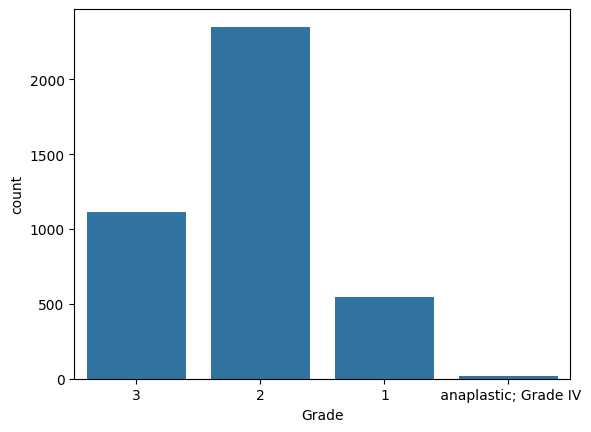

In [14]:
sns.countplot(x='Grade',data=df)

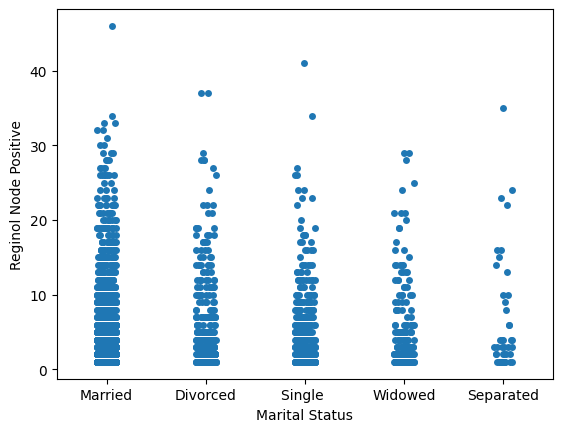

In [15]:
sns.stripplot(x="Marital Status", y="Reginol Node Positive", data=df)
plt.show()

In [32]:
def plot_numerical(feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=feature,kde=True)
    plt.xlabel(feature,fontsize=12,weight="bold")
    plt.ylabel("Freq",fontsize=12,weight="bold")
    plt.subplot(1,2,2)
    sns.boxplot(data=df,x=feature)
    plt.xlabel(feature,fontsize=12,weight="bold")
    plt.suptitle(feature,weight="bold",fontsize=20,color='red')
    plt.show()
def skewness(feature):
    mean_value = np.mean(feature)
    std_dev = np.std(feature)
    n = len(feature)
    skew = (sum((feature - mean_value) ** 3 ) / n) / ( std_dev ** 3)
    return skew
   

Skewness of Age: -0.22029063054721387
Not Skewed


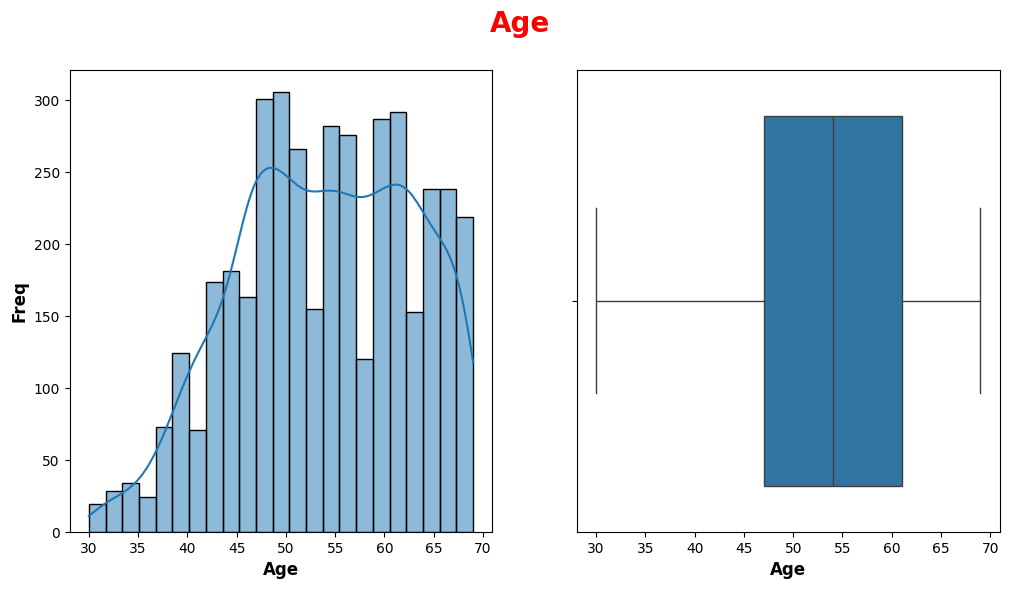

Skewness of Tumor Size: 1.7391012184234131
Right Skewed


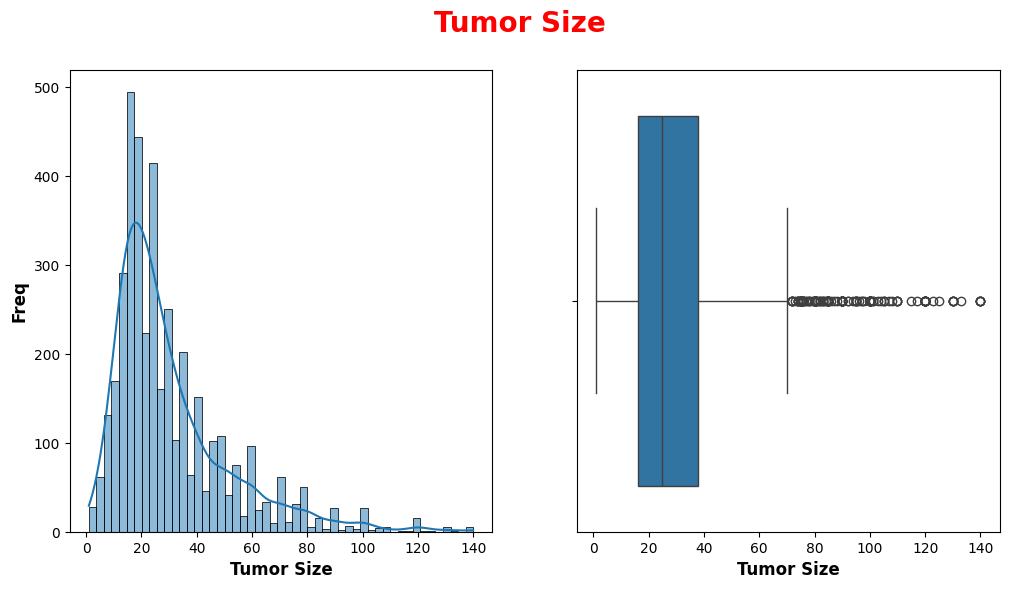

Skewness of Regional Node Examined: 0.8289646145136143
Right Skewed


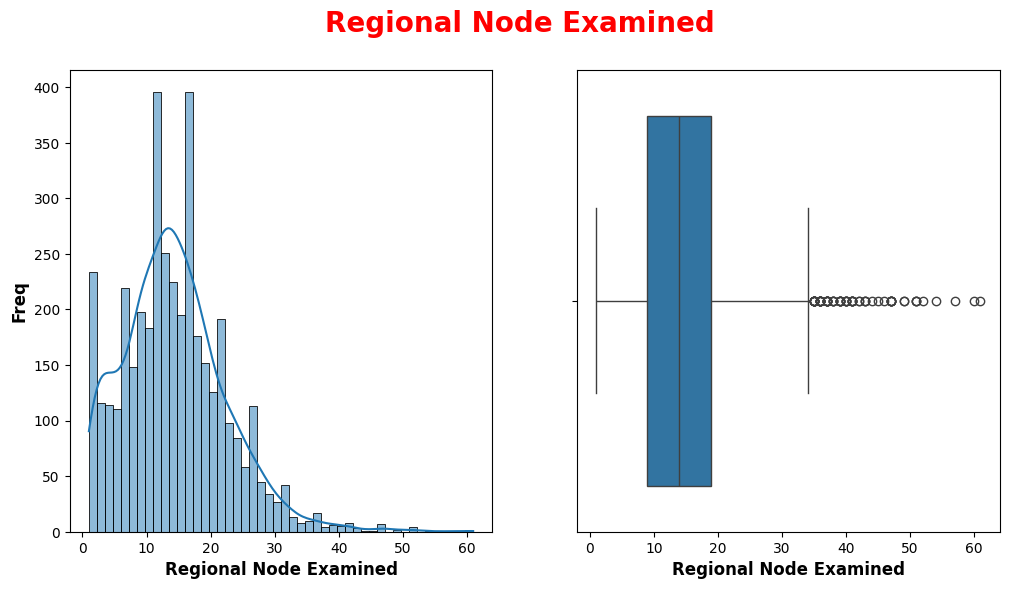

Skewness of Reginol Node Positive: 2.701528348961195
Right Skewed


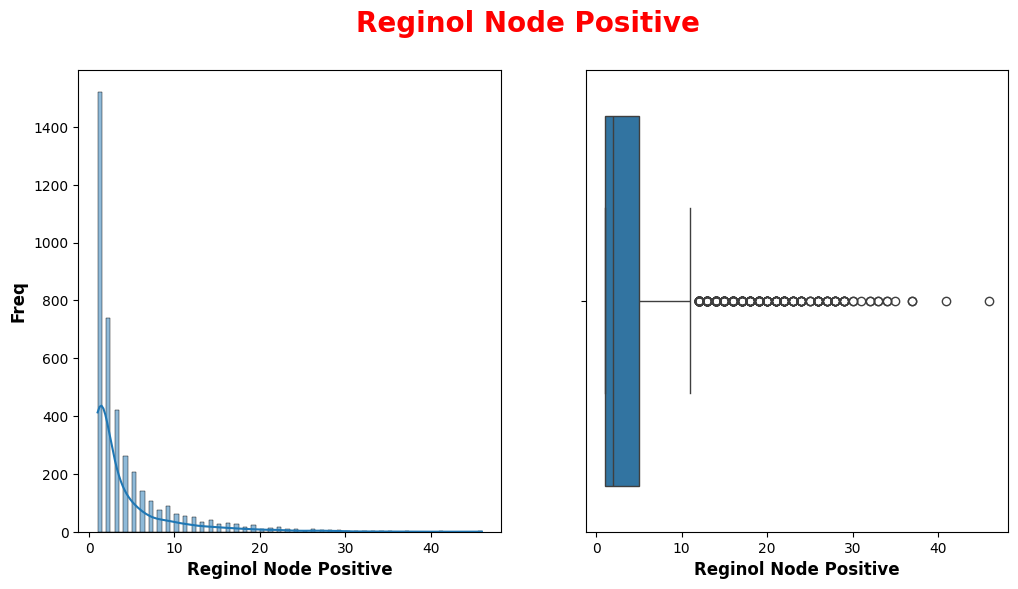

Skewness of Survival Months: -0.5897783741465601
Left Skewed


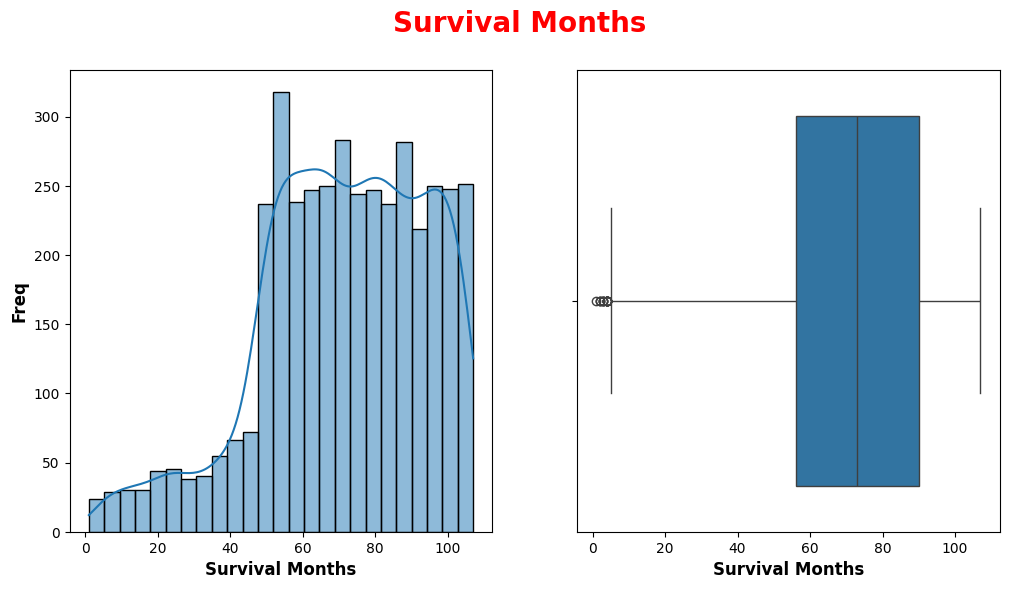

In [33]:
features = df.select_dtypes(exclude=['object']).columns

for feature in features:
    skew_value = skewness(df[feature])
    print(f"Skewness of {feature}: {skew_value}")
    if(skew_value>0.5):
        print("Right Skewed")
    
    elif(-0.5<=skew_value<=0.5):
        print("Not Skewed")
    
    else:
        print("Left Skewed")
    
    plot_numerical(feature)
 

In [34]:
def remove_outliers_iqr(df):
    df_clean = df.copy()
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns  

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1  

       
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

    
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean


df = remove_outliers_iqr(df)
print("Original DataFrame:\n", df)
print("\nDataFrame After Outlier Removal:\n", df)


Original DataFrame:
       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive 

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   Age  Race  Marital Status  T Stage   N Stage  6th Stage  differentiate  \
0   68     2               1         0        0          0              1   
1   50     2               1         1        1          2              0   
2   58     2               0         2        2          4              0   
3   58     2               1         0        0          0              1   
4   47     2               1         1        0          1              1   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0      3        1           4                1                    1   
1      2        1          35                1                    1   
2      2        1          63                1                    1   
3      3        1          18                1                    1   
4      3        1          41                1                    1   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24         

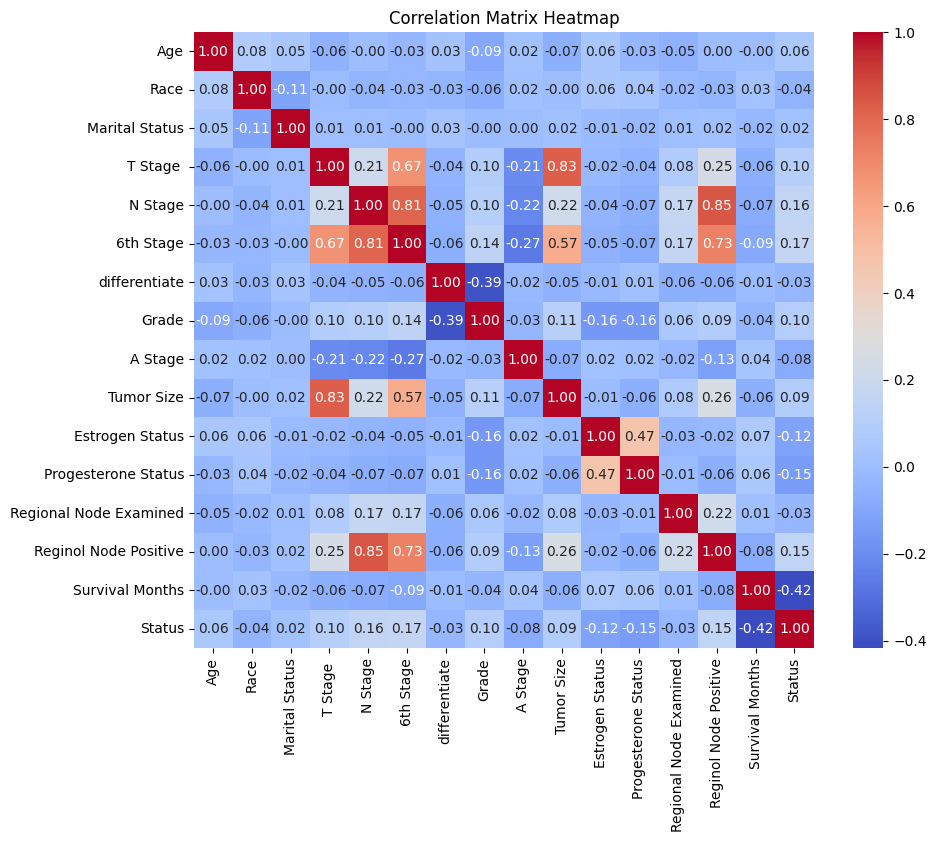

In [36]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler

target_column = 'Status'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_column)
scaler = StandardScaler()

df_scaled = df.copy() 
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df.drop('Status', axis=1) 
y = df['Status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\awadh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = lr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       609
           1       0.80      0.35      0.49        80

    accuracy                           0.91       689
   macro avg       0.86      0.67      0.72       689
weighted avg       0.91      0.91      0.90       689

[[602   7]
 [ 52  28]]


In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.91


In [41]:
from sklearn.metrics import f1_score
# Compute F1-score
f1 = f1_score(y_test, y_pred)  
print("F1 Score:", f1)


F1 Score: 0.48695652173913045


In [42]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72,0


In [25]:
### Using stamdard scaler in  order to increase measuring matrix like f1_score accuracy_score etc.

In [43]:
from sklearn.preprocessing import StandardScaler

target_column = 'Status'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_column)
scaler = StandardScaler()

df_scaled = df.copy() 
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])



In [44]:
df_scaled

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,1.570254,0.398014,-0.355663,-0.976510,-0.537883,-1.017326,0.298945,1.404837,0.102778,-1.513378,0.242983,0.439713,1.527709,-0.741290,-0.577341,0
1,-0.449356,0.398014,-0.355663,0.473727,1.389765,0.996278,-0.666878,-0.169092,0.102778,0.595314,0.242983,0.439713,0.115017,0.928430,-0.485506,0
2,0.448248,0.398014,-1.302999,1.923965,3.317412,3.009881,-0.666878,-0.169092,0.102778,2.499939,0.242983,0.439713,0.115017,1.763290,0.111420,0
3,0.448248,0.398014,-0.355663,-0.976510,-0.537883,-1.017326,0.298945,1.404837,0.102778,-0.561066,0.242983,0.439713,-1.580214,-0.741290,0.524678,0
4,-0.785958,0.398014,-0.355663,0.473727,-0.537883,-0.010524,0.298945,1.404837,0.102778,1.003448,0.242983,0.439713,-1.438944,-0.741290,-1.036516,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,0.897051,-1.372993,-0.355663,-0.976510,-0.537883,-1.017326,-0.666878,-0.169092,0.102778,-1.173267,0.242983,0.439713,-1.721483,-0.741290,-1.082433,0
4020,0.223847,0.398014,-1.302999,0.473727,1.389765,0.996278,-0.666878,-0.169092,0.102778,1.343560,0.242983,0.439713,0.115017,2.180721,-0.164084,0
4021,1.570254,0.398014,-0.355663,0.473727,-0.537883,-0.010524,-0.666878,-0.169092,0.102778,-0.288976,0.242983,-2.274213,-0.308791,0.093570,-0.164084,0
4022,0.448248,-3.143999,-1.302999,0.473727,-0.537883,-0.010524,-0.666878,-0.169092,0.102778,1.207515,0.242983,0.439713,-0.308791,-0.741290,-0.026332,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df_scaled.drop('Status', axis=1) 
y = df_scaled['Status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


from sklearn.metrics import f1_score
# Compute F1-score
f1 = f1_score(y_test, y_pred)  
print("F1 Score:", f1)

# But measurement matrix chnages by small values

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       609
           1       0.81      0.36      0.50        80

    accuracy                           0.92       689
   macro avg       0.86      0.68      0.73       689
weighted avg       0.91      0.92      0.90       689

[[602   7]
 [ 51  29]]
Accuracy: 0.92
F1 Score: 0.5


In [29]:
# # Now i have a data which is free from outliers ,encoded and standarised and after making this my accuracy score increases from 90 percent to 92 percent
# and r2 score and f1 score is got droped

### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)



Accuracy Score: 0.9100145137880987


### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(
    n_estimators=100,  
    criterion='gini', 
    max_depth=5,       
    random_state=42    
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


f1 = f1_score(y_test, y_pred, average='binary') 
print(f1)

Accuracy Score: 0.9100145137880987
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       609
           1       0.78      0.31      0.45        80

    accuracy                           0.91       689
   macro avg       0.85      0.65      0.70       689
weighted avg       0.90      0.91      0.89       689

[[602   7]
 [ 55  25]]
0.44642857142857145


### KNN Algorithms 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

knn = KNeighborsClassifier(
    n_neighbors=5, 
    weights='uniform'
)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average='binary') 
print(f1)

0.8940493468795355
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       609
           1       0.65      0.19      0.29        80

    accuracy                           0.89       689
   macro avg       0.78      0.59      0.62       689
weighted avg       0.87      0.89      0.87       689

[[601   8]
 [ 65  15]]
0.2912621359223301


### SVM Algorithms

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

svm = SVC(kernel='rbf', C=1.0) 


svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


f1 = f1_score(y_test, y_pred, average='binary')  
print("F1 Score:", f1)


Accuracy: 0.8984034833091437
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       609
           1       0.81      0.16      0.27        80

    accuracy                           0.90       689
   macro avg       0.86      0.58      0.61       689
weighted avg       0.89      0.90      0.87       689

Confusion Matrix:
 [[606   3]
 [ 67  13]]
F1 Score: 0.2708333333333333


### Xg Boost code

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("Classification Report:\n", classification_report(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='binary')  
print("F1 Score:", f1)




Accuracy: 0.9172714078374455
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       609
           1       0.73      0.46      0.56        80

    accuracy                           0.92       689
   macro avg       0.83      0.72      0.76       689
weighted avg       0.91      0.92      0.91       689

Confusion Matrix:
 [[595  14]
 [ 43  37]]
F1 Score: 0.5648854961832062


In [52]:
correlation_matrix = df.corr()

# Get correlation values of each column with the target variable
correlation_with_target = correlation_matrix['Status']

# Identify columns with negative correlation
negatively_correlated_columns = correlation_with_target[correlation_with_target <0].index.tolist()

# Drop negatively correlated columns
df_cleaned = df.drop(columns=negatively_correlated_columns)

print("Dropped columns:", negatively_correlated_columns)
print(df_cleaned)


Dropped columns: ['Race', 'differentiate', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Survival Months']
      Age  Marital Status  T Stage   N Stage  6th Stage  Grade  Tumor Size  \
0      68               1         0        0          0      3           4   
1      50               1         1        1          2      2          35   
2      58               0         2        2          4      2          63   
3      58               1         0        0          0      3          18   
4      47               1         1        0          1      3          41   
...   ...             ...       ...      ...        ...    ...         ...   
4019   62               1         0        0          0      2           9   
4020   56               0         1        1          2      2          46   
4021   68               1         1        0          1      2          22   
4022   58               0         1        0          1      2          44   
4

In [53]:
df_cleaned

,Age,Marital Status,T Stage,N Stage,6th Stage,Grade,Tumor Size,Reginol Node Positive,Status
0,68,1,0,0,0,3,4,1,0
1,50,1,1,1,2,2,35,5,0
2,58,0,2,2,4,2,63,7,0
3,58,1,0,0,0,3,18,1,0
4,47,1,1,0,1,3,41,1,0
...,...,...,...,...,...,...,...,...,...
4019,62,1,0,0,0,2,9,1,0
4020,56,0,1,1,2,2,46,8,0
4021,68,1,1,0,1,2,22,3,0
4022,58,0,1,0,1,2,44,1,0


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df_cleaned.drop('Status', axis=1) 
y = df_cleaned['Status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


from sklearn.metrics import f1_score
# Compute F1-score
f1 = f1_score(y_test, y_pred)  
print("F1 Score:", f1)

# But measurement matrix chnages by small values

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       609
           1       0.00      0.00      0.00        80

    accuracy                           0.88       689
   macro avg       0.44      0.50      0.47       689
weighted avg       0.78      0.88      0.83       689

[[609   0]
 [ 80   0]]
Accuracy: 0.88
F1 Score: 0.0


C:\Users\awadh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\awadh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\awadh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.p